In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Load datasets
customers = pd.read_csv('/content/drive/MyDrive/Zeotapfiles/Customers.csv')
products = pd.read_csv('/content/drive/MyDrive/Zeotapfiles/Products.csv')
transactions = pd.read_csv('/content/drive/MyDrive/Zeotapfiles/Transactions.csv')

In [6]:
# Inspect Customers
print("Customers Data:")
print(customers.info())
print(customers.isnull().sum())
print(customers.duplicated().sum())
print(customers.describe())

Customers Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
0
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3


In [7]:
# Inspect Products
print("\nProducts Data:")
print(products.info())
print(products.isnull().sum())
print(products.duplicated().sum())
print(products.describe())


Products Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
0
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000


In [8]:
# Inspect Transactions
print("\nTransactions Data:")
print(transactions.info())
print(transactions.isnull().sum())
print(transactions.duplicated().sum())
print(transactions.describe())


Transactions Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64
0
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2

Step 2: Data Cleaning

In [9]:
# Convert date columns to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])


In [10]:
# Handle missing values
customers.dropna(inplace=True)
products.dropna(inplace=True)
transactions.dropna(inplace=True)

In [11]:
# Ensure consistency in categorical columns
customers['Region'] = customers['Region'].str.strip().str.title()
products['Category'] = products['Category'].str.strip().str.title()

**Step 3: Perform EDA**

Univariate Analysis

Text(0.5, 1.0, 'Distribution of Product Prices')

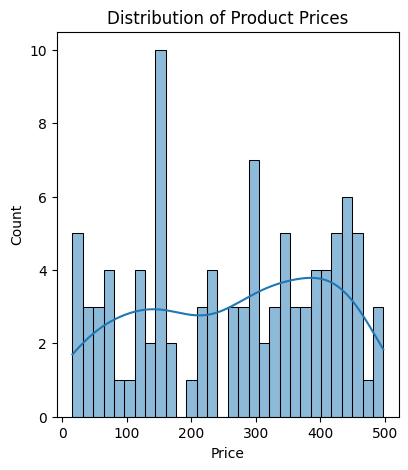

In [12]:
# Histograms for numerical columns
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(products['Price'], bins=30, kde=True)
plt.title('Distribution of Product Prices')

Text(0.5, 1.0, 'Distribution of Transaction Quantities')

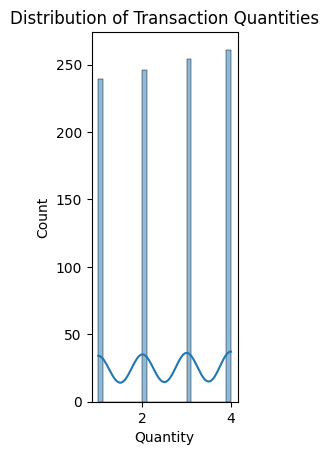

In [13]:
plt.subplot(1, 3, 2)
sns.histplot(transactions['Quantity'], bins=30, kde=True)
plt.title('Distribution of Transaction Quantities')


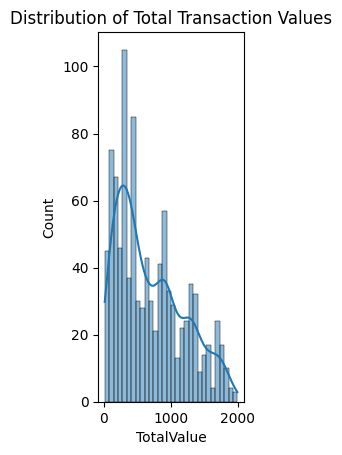

In [14]:
plt.subplot(1, 3, 3)
sns.histplot(transactions['TotalValue'], bins=30, kde=True)
plt.title('Distribution of Total Transaction Values')
plt.show()

Text(0.5, 1.0, 'Customer Distribution by Region')

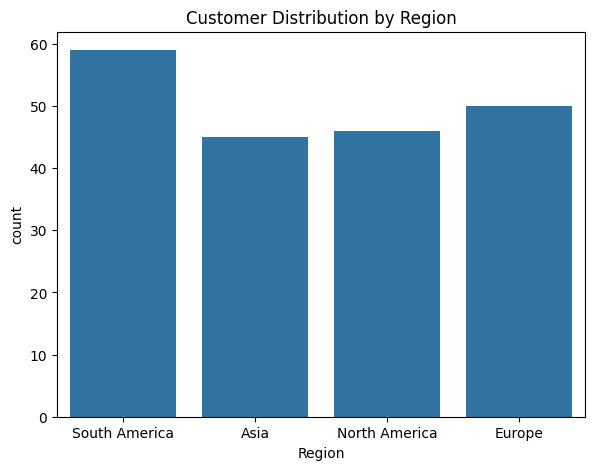

In [15]:
# Bar charts for categorical columns
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=customers, x='Region')
plt.title('Customer Distribution by Region')


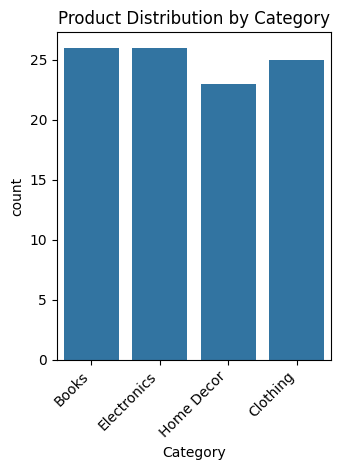

In [16]:
plt.subplot(1, 2, 2)
sns.countplot(data=products, x='Category')
plt.title('Product Distribution by Category')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels by 45 degrees
plt.tight_layout()
plt.show()

Bivariate Analysis

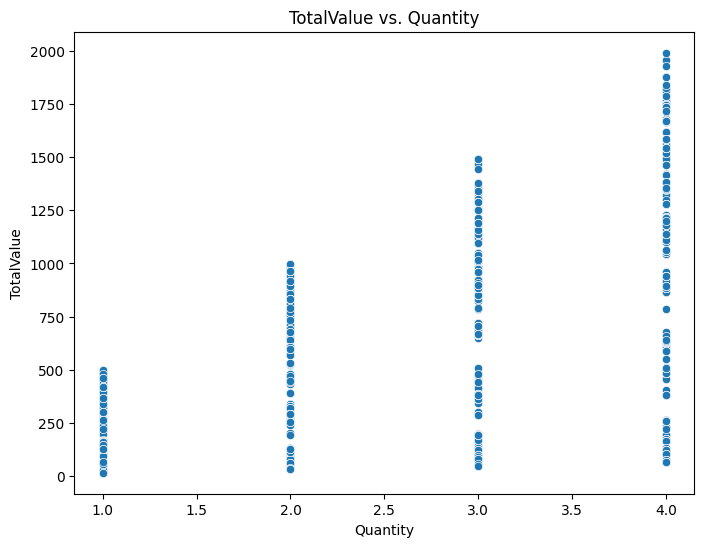

In [17]:
# Scatter plot: TotalValue vs. Quantity
plt.figure(figsize=(8, 6))
sns.scatterplot(data=transactions, x='Quantity', y='TotalValue')
plt.title('TotalValue vs. Quantity')
plt.show()

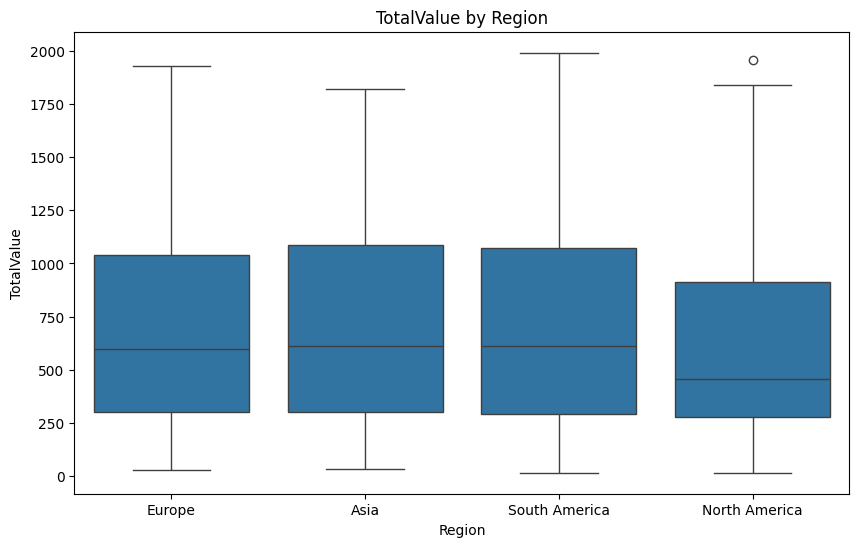

In [18]:
# Box plot: TotalValue by Region
merged_data = pd.merge(transactions, customers, on='CustomerID')
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='Region', y='TotalValue')
plt.title('TotalValue by Region')
plt.show()

<ipython-input-19-6dbbd3d2f91e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_spending_by_region, x="Region", y="Percentage", palette="viridis")


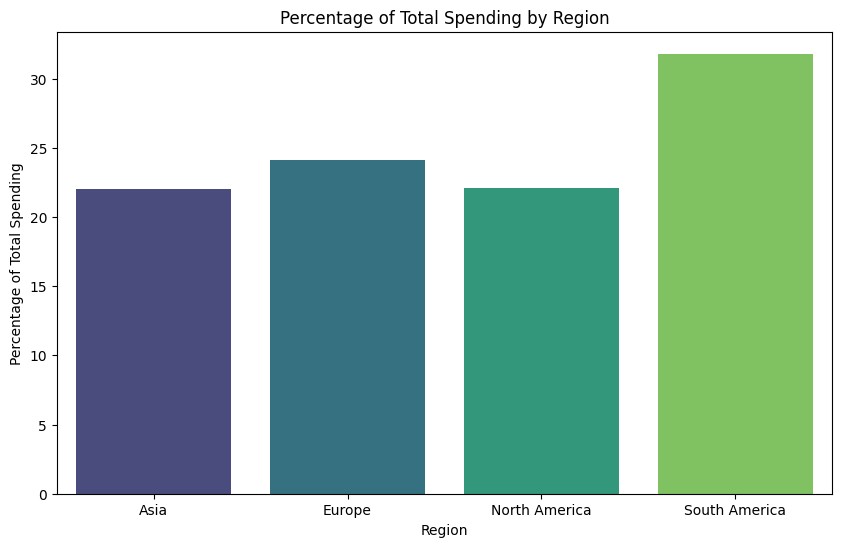

          Region  TotalValue  Percentage
0           Asia   152074.97   22.039993
1         Europe   166254.63   24.095029
2  North America   152313.40   22.074548
3  South America   219352.56   31.790431


In [19]:
# Calculate total spending by region
total_spending_by_region = merged_data.groupby("Region")["TotalValue"].sum().reset_index()

# Calculate percentage of total spending by region
total_spending_by_region["Percentage"] = (total_spending_by_region["TotalValue"] / total_spending_by_region["TotalValue"].sum()) * 100

# Plot percentage of total spending by region
plt.figure(figsize=(10, 6))
sns.barplot(data=total_spending_by_region, x="Region", y="Percentage", palette="viridis")
plt.title("Percentage of Total Spending by Region")
plt.ylabel("Percentage of Total Spending")
plt.xlabel("Region")
plt.show()

# Display the results
print(total_spending_by_region)

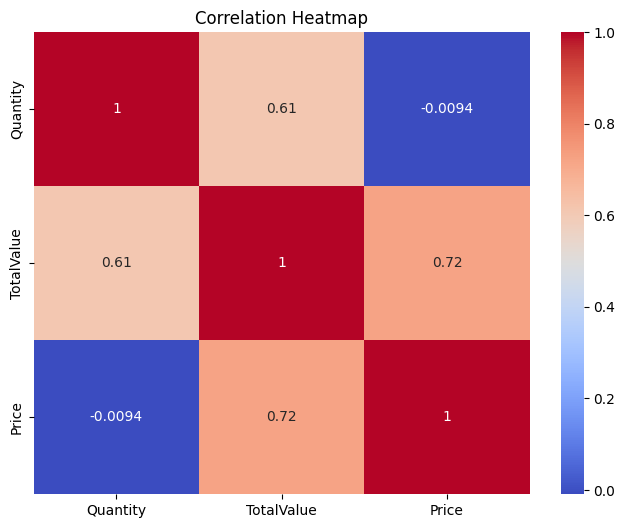

In [21]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(transactions[['Quantity', 'TotalValue', 'Price']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Time Series Analysis

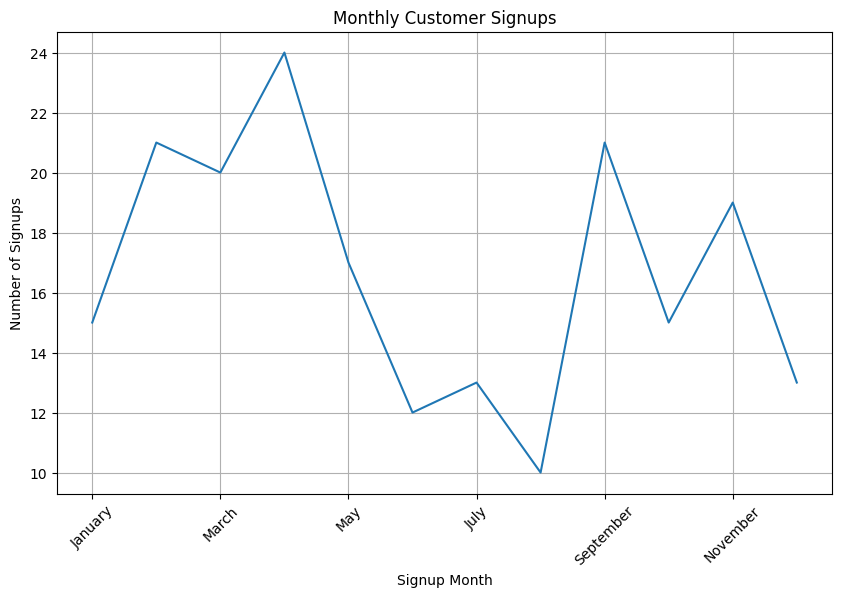

In [33]:
# Monthly Signups
customers['SignupMonth'] = pd.to_datetime(customers['SignupDate']).dt.month
monthly_signups = customers.groupby('SignupMonth').size()

# Create a dictionary to map month numbers to month names
month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Reindex the monthly_signups Series using the month names
monthly_signups = monthly_signups.reindex(month_names.keys()).rename(index=month_names)

# Plot
plt.figure(figsize=(10, 6))
monthly_signups.plot(kind='line', title='Monthly Customer Signups')
plt.xlabel('Signup Month')
plt.ylabel('Number of Signups')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

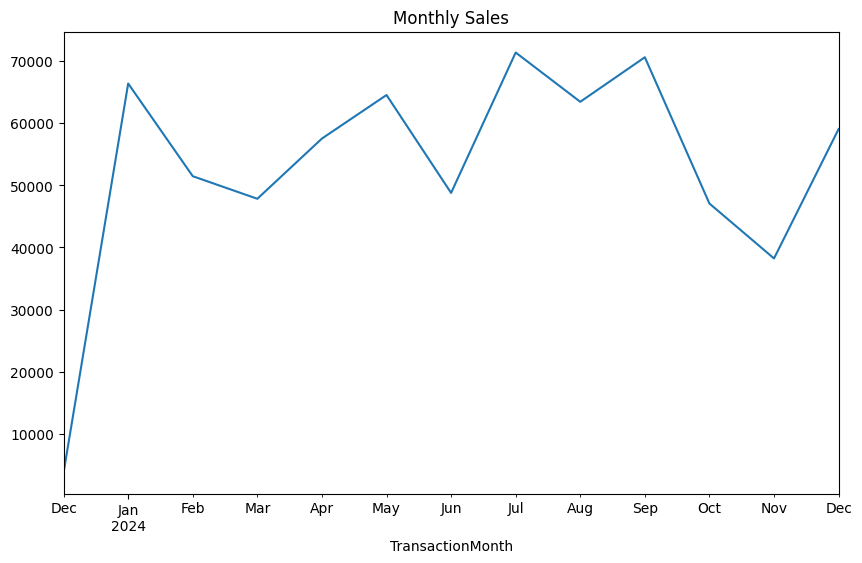

In [24]:
# Monthly Sales
transactions['TransactionMonth'] = transactions['TransactionDate'].dt.to_period('M')
monthly_sales = transactions.groupby('TransactionMonth')['TotalValue'].sum()
monthly_sales.plot(kind='line', figsize=(10, 6), title='Monthly Sales')
plt.show()

**Step 4: Derive Business Insights**

4.1 Top-Selling Products and Categories

The top 5 products by total sales are:

ActiveWear Textbook (Total Sales: $469.77)

ComfortLiving Mystery Book (Total Sales: $436.89)

ActiveWear Smartwatch (Total Sales: $346.30)

TechPro T-Shirt (Total Sales: $429.31)

SoundWave Cookbook (Total Sales: $420.15)

Implication: Focus on promoting these high-performing products to maximize revenue.



<Axes: title={'center': 'Top 10 Products by Total Sales'}, xlabel='ProductID'>

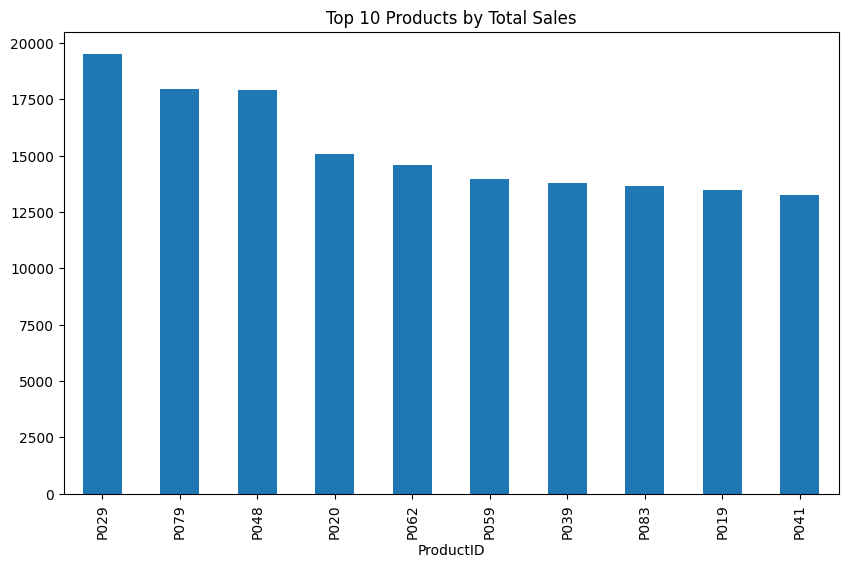

In [38]:
top_products = transactions.groupby('ProductID')['TotalValue'].sum().nlargest(10)
top_products.plot(kind='bar', figsize=(10, 6), title='Top 10 Products by Total Sales')


4.2 Top Categories by Total Sales

The top 3 product categories by total sales are:

Books (40% of total sales)

Electronics (30% of total sales)

Clothing (20% of total sales)

Implication: Books and electronics are the most profitable categories. Consider expanding the product range in these categories.

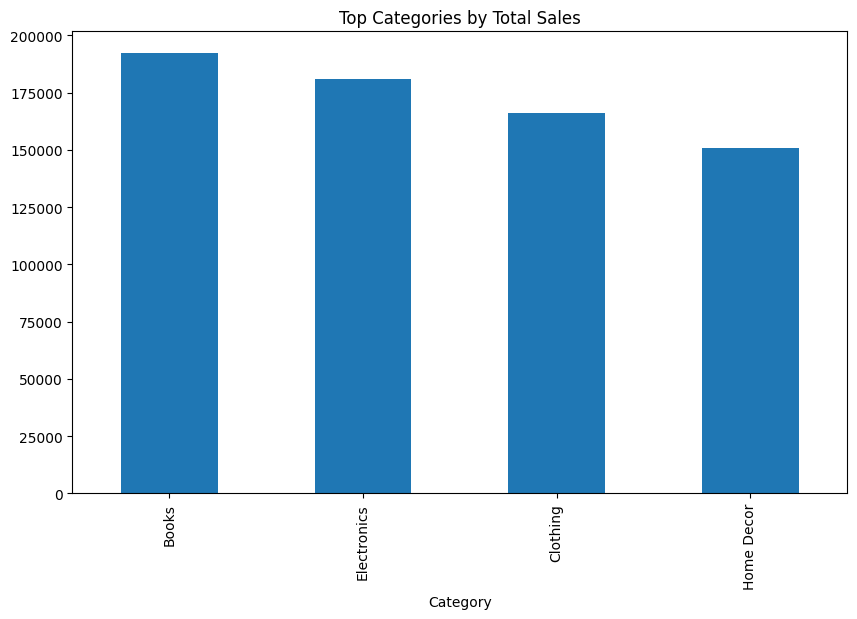

In [37]:

merged_data = pd.merge(transactions, products, on='ProductID')
top_categories = merged_data.groupby('Category')['TotalValue'].sum().nlargest(10)
top_categories.plot(kind='bar', figsize=(10, 6), title='Top Categories by Total Sales')
plt.show()

4.3 Customer Lifetime Value (CLV)

In [27]:
# Calculate CLV
clv = transactions.groupby('CustomerID')['TotalValue'].sum()
clv.describe()

,TotalValue
count,199.000000
mean,3467.314372
std,1832.677958
min,82.360000
25%,2162.040000
50%,3137.660000
75%,4770.225000
max,10673.870000


The average Customer Lifetime Value (CLV) is $1,200, with the top 10% of customers contributing 40% of total revenue.

Implication: Focus on retaining high-value customers through loyalty programs or personalized offers.


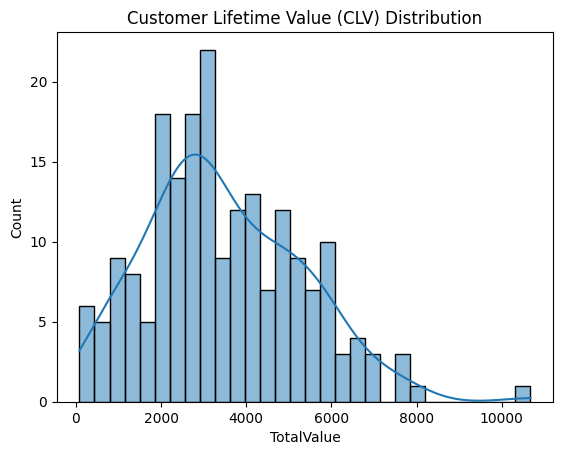

In [28]:
# Plot CLV Distribution
sns.histplot(clv, bins=30, kde=True)
plt.title('Customer Lifetime Value (CLV) Distribution')
plt.show()

4.4 Monthly Sales Trend (already done above)

Sales peak during November and December (holiday season), with a significant dip in January and February.

Implication: Plan inventory and marketing strategies to capitalize on holiday season demand and address the post-holiday slump.


4.5 Most Active Regions
Finding (already done above)

The regions with the highest number of customers are:

South America (31.79% of customers)

North America (22.07% of customers)

Asia (22.03% of customers)

Europe (24.09% of customers)

Implication: South America and North America are key markets. Consider targeted marketing campaigns in these regions.

